<a href="https://colab.research.google.com/github/shubhamkambleX/Mnist-Classification/blob/main/HandWritten_Digit_Recognization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name :Shubham Suresh Kamble 

Importing the Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

Loading the dataset from tensorflow

In [ ]:
(ds_train,ds_test), ds_info = tfds.load('mnist', 
                             split=['train','test'], 
                             shuffle_files=True,
                             as_supervised=True,
                             with_info=True
                             )

Defining the function for normalizing the image from 0 to 1

In [ ]:
def normalize_img(image,label):
  return tf.cast(image, tf.float32)/255., label

Slipting Data into train and test

In [ ]:
# train data
ds_train = ds_train.map(normalize_img,num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache().shuffle(ds_info.splits['train'].num_examples).batch(128).prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
# test data
ds_test = ds_test.map(normalize_img,num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128).cache().prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
ds_train

<PrefetchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>

In [ ]:
classes = [0,1,2,3,4,5,6,7,8,9]

classes for labeling and figure of digit using matplotlib

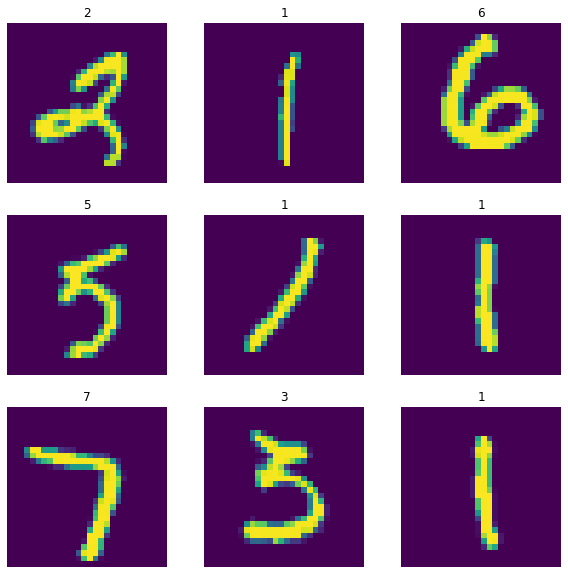

In [ ]:
plt.figure(figsize=(10,10))
for images,labels in ds_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    image = np.squeeze(images[i])
    plt.imshow(image)
    plt.title(classes[labels[i]])
    plt.axis('off')

creating model

In [ ]:
model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(128,activation='relu'),
tf.keras.layers.Dense(10,)
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
history = model.fit(ds_train,epochs=6,validation_data=ds_test)

Epoch 1/6
469/469 [==============================] - 2s 4ms/step - loss: 0.5978 - sparse_categorical_accuracy: 0.8371 - val_loss: 0.2056 - val_sparse_categorical_accuracy: 0.9407
Epoch 2/6
469/469 [==============================] - 1s 2ms/step - loss: 0.1772 - sparse_categorical_accuracy: 0.9507 - val_loss: 0.1400 - val_sparse_categorical_accuracy: 0.9605
Epoch 3/6
469/469 [==============================] - 1s 2ms/step - loss: 0.1268 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.1134 - val_sparse_categorical_accuracy: 0.9661
Epoch 4/6
469/469 [==============================] - 1s 2ms/step - loss: 0.0952 - sparse_categorical_accuracy: 0.9731 - val_loss: 0.1002 - val_sparse_categorical_accuracy: 0.9698
Epoch 5/6
469/469 [==============================] - 1s 2ms/step - loss: 0.0769 - sparse_categorical_accuracy: 0.9781 - val_loss: 0.0932 - val_sparse_categorical_accuracy: 0.9718
Epoch 6/6
469/469 [==============================] - 1s 2ms/step - loss: 0.0641 - sparse_categorical_accu

checking the loss error value by ploting it

In [ ]:
for e in history.history:
  print(e)

loss
sparse_categorical_accuracy
val_loss
val_sparse_categorical_accuracy


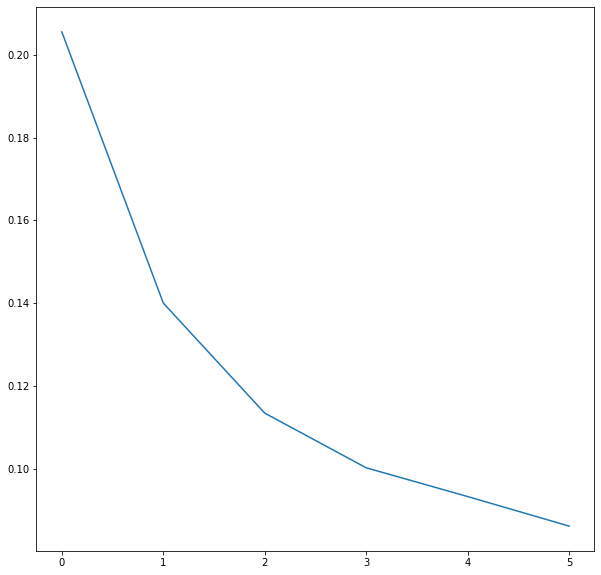

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(range(6),history.history['val_loss'])

In [ ]:
model.evaluate(ds_test)

79/79 [==============================] - 0s 2ms/step - loss: 0.0861 - sparse_categorical_accuracy: 0.9735


[0.08609045296907425, 0.9735000133514404]

In [ ]:
pred = model.predict(ds_test)

In [ ]:
pred

array([[ -4.2192793 ,  -3.9361532 ,  11.688729  , ...,  -7.2287436 ,
          0.167075  ,  -1.1550156 ],
       [ 17.278887  ,  -8.927838  ,  -4.27385   , ...,  -7.345607  ,
         -4.34468   ,  -6.145328  ],
       [ -6.699775  ,  -6.5933723 ,  -5.4197574 , ...,   1.3541538 ,
         -3.951433  ,   3.6976962 ],
       ...,
       [ -1.9938649 , -10.841571  ,   1.8118038 , ..., -11.903083  ,
         10.208027  ,  -2.3158226 ],
       [ 15.033079  ,  -8.260926  ,   2.999284  , ...,  -2.0012426 ,
         -7.570255  ,  -1.7629253 ],
       [ -2.491114  ,  -5.421208  ,  -6.5740194 , ...,  -8.702948  ,
          0.30308536,  -1.9489864 ]], dtype=float32)

taking the highest max value from that particular array

In [ ]:
pred = list(map(lambda x: np.argmax(x),pred))

In [ ]:
pred

[2,
 0,
 4,
 8,
 7,
 6,
 0,
 6,
 3,
 1,
 8,
 0,
 7,
 9,
 8,
 4,
 5,
 3,
 4,
 0,
 6,
 6,
 3,
 0,
 2,
 3,
 6,
 6,
 7,
 4,
 0,
 3,
 8,
 2,
 5,
 4,
 2,
 5,
 5,
 8,
 5,
 2,
 9,
 2,
 4,
 2,
 7,
 5,
 0,
 1,
 0,
 7,
 9,
 9,
 9,
 6,
 8,
 6,
 9,
 0,
 5,
 4,
 2,
 8,
 5,
 6,
 8,
 6,
 1,
 9,
 0,
 5,
 5,
 4,
 1,
 6,
 7,
 5,
 2,
 0,
 9,
 6,
 4,
 4,
 2,
 8,
 3,
 8,
 7,
 9,
 0,
 0,
 1,
 1,
 4,
 5,
 9,
 9,
 6,
 6,
 0,
 7,
 1,
 8,
 4,
 7,
 8,
 8,
 1,
 8,
 0,
 2,
 9,
 1,
 0,
 3,
 9,
 7,
 0,
 4,
 9,
 6,
 8,
 9,
 3,
 5,
 4,
 3,
 2,
 2,
 4,
 3,
 0,
 2,
 3,
 5,
 1,
 1,
 2,
 4,
 8,
 2,
 2,
 6,
 8,
 6,
 1,
 0,
 7,
 1,
 6,
 7,
 2,
 3,
 4,
 4,
 6,
 9,
 0,
 2,
 8,
 8,
 6,
 9,
 0,
 7,
 8,
 2,
 9,
 2,
 0,
 3,
 2,
 8,
 7,
 0,
 1,
 7,
 8,
 5,
 1,
 2,
 3,
 1,
 9,
 8,
 7,
 9,
 0,
 8,
 3,
 9,
 3,
 9,
 7,
 4,
 9,
 3,
 1,
 2,
 2,
 6,
 0,
 7,
 6,
 9,
 5,
 9,
 7,
 4,
 2,
 0,
 1,
 0,
 4,
 9,
 9,
 1,
 9,
 2,
 2,
 0,
 5,
 6,
 0,
 0,
 0,
 7,
 7,
 4,
 7,
 5,
 1,
 7,
 7,
 8,
 2,
 5,
 9,
 6,
 6,
 8,
 0,
 1,
 2,
 1,
 7,
 7,
 7,
 3,


plotted the final prediction of digit using test data 
In this blue are correctly classified and red are misclassified

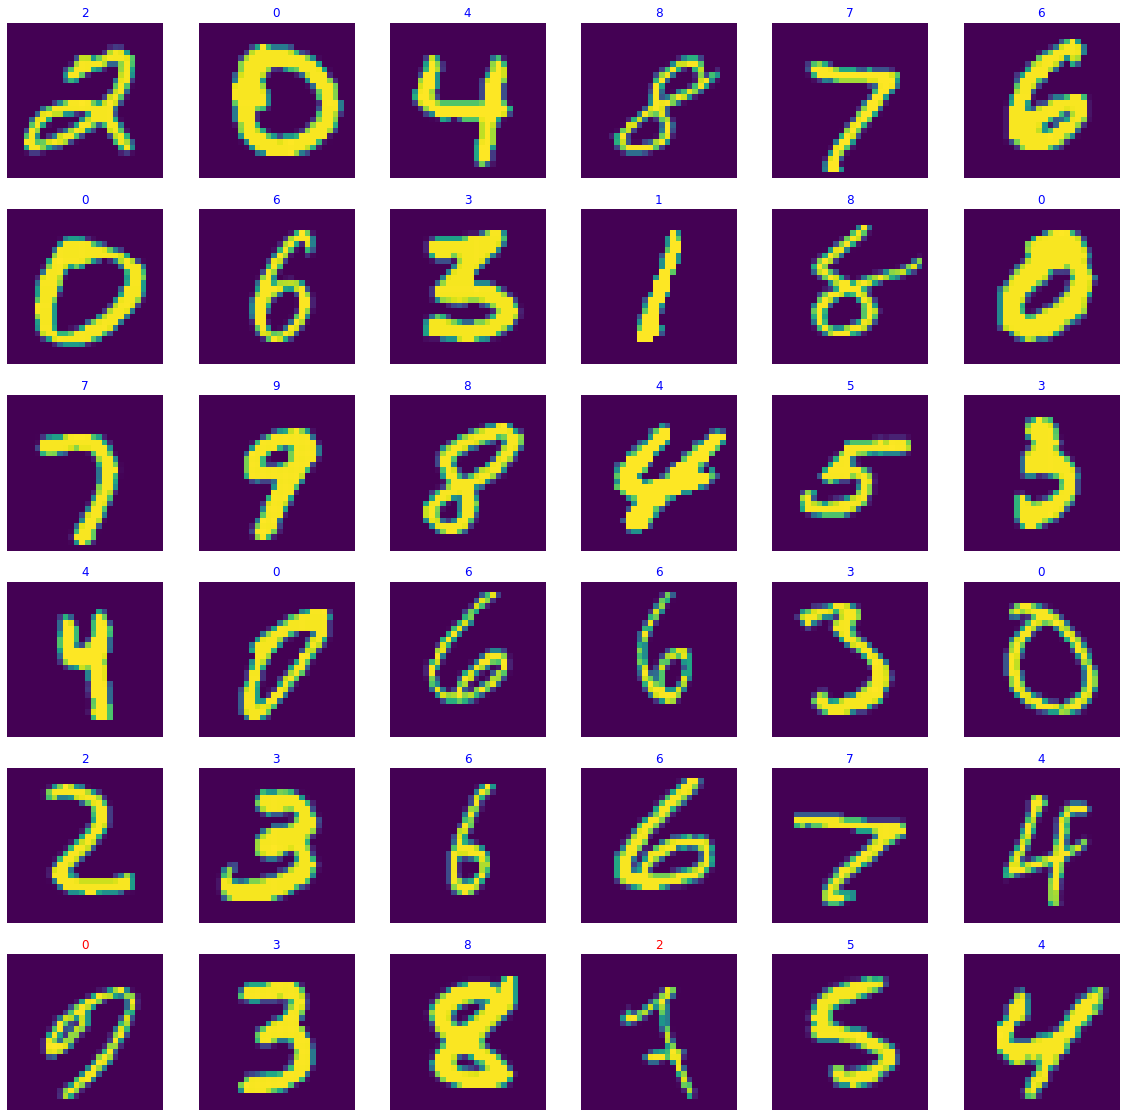

In [ ]:
plt.figure(figsize=(20,20))
for images,labels in ds_test.take(1):
  for i in range(36):
    ax = plt.subplot(6, 6, i + 1)
    image = np.squeeze(images[i])
    plt.imshow(image)
    prediction = pred[i] == classes[labels[i]]
    plt.title(pred[i],color=('blue' if prediction else 'red'))
    plt.axis('off')